In [33]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [306]:
fiche = 'Data.csv'
df = pd.read_csv(fiche)

In [288]:
selected_columns = [
    'Country',
    'Year',
    'Total Population, as of 1 January (thousands)',
    'Population Growth Rate (percentage)',
    'Total Fertility Rate (live births per woman)',
    'Life Expectancy at Birth, both sexes (years)',
    'Infant Mortality Rate (infant deaths per 1,000 live births)',
    'Mean Age Childbearing (years)',
    'Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)',
    'Births by women aged 15 to 19 (thousands)',
    'Infant Deaths, under age 1 (thousands)',
    'Under-Five Deaths, under age 5 (thousands)'
]

filtered_data = df[selected_columns]

In [367]:
aggregated_data = filtered_data.groupby('Country').mean(numeric_only=True).reset_index()
aggregated_country_names = aggregated_data['Country']
aggregated_features = aggregated_data.drop(columns=['Country']).values


aggregated_normalized_data = scaler.fit_transform(aggregated_features)

In [182]:
from sklearn.neighbors import NearestNeighbors


k = 5
knn = NearestNeighbors(n_neighbors=k, metric='euclidean')
knn.fit(aggregated_normalized_data)


NearestNeighbors(metric='euclidean')

In [359]:
def recommend_countries(country_name, num_recommendations=5):
    if country_name not in aggregated_country_names.values:
        return f"Le pays '{country_name}' n'est pas dans la liste."

    country_index = aggregated_country_names[aggregated_country_names == country_name].index[0]
    
    distances, indices = knn.kneighbors([aggregated_normalized_data[country_index]], n_neighbors=num_recommendations + 1)

    recommended_countries = [
        aggregated_country_names.iloc[i] for i in indices[0] if aggregated_country_names.iloc[i] != country_name
    ]
    return recommended_countries[:num_recommendations],distances

In [362]:
country_to_recommend = "Morocco"
recommendations,distances = recommend_countries(country_to_recommend)
print(f"Pays similaires à '{country_to_recommend}' : {recommendations} ,{distances}")


Pays similaires à 'Morocco' : ['Mongolia', 'Kiribati', 'Papua New Guinea', 'Myanmar', 'Bolivia (Plurinational State of)'] ,[[0.         0.67386836 0.77556755 0.86965864 0.91089937 1.0241578 ]]


In [363]:
country_to_recommend = "France"
recommendations = recommend_countries(country_to_recommend)
print(f"Pays similaires à '{country_to_recommend}' : {recommendations}")


Pays similaires à 'France' : (['United Kingdom', 'Germany', 'Belgium', 'Denmark', 'Greece'], array([[0.        , 0.37092819, 0.57344092, 0.58813632, 0.6291729 ,
        0.6520162 ]]))


In [364]:
country_to_recommend = "Canada"
recommendations = recommend_countries(country_to_recommend)
print(f"Pays similaires à '{country_to_recommend}' : {recommendations}")

Pays similaires à 'Canada' : (['Australia', 'Iceland', 'New Zealand', 'Luxembourg', 'Jersey'], array([[0.        , 0.25543044, 0.49770763, 0.50017782, 0.65475344,
        0.7132027 ]]))


In [ ]:
#cosine_similarity 

In [233]:
selected_columns = [
    'Country',
    'Year',
    'Total Population, as of 1 January (thousands)',
    'Population Growth Rate (percentage)',
    'Total Fertility Rate (live births per woman)',
    'Life Expectancy at Birth, both sexes (years)',
    'Infant Mortality Rate (infant deaths per 1,000 live births)',
    'Mean Age Childbearing (years)',
    'Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)',
    'Births by women aged 15 to 19 (thousands)',
    'Infant Deaths, under age 1 (thousands)',
    'Under-Five Deaths, under age 5 (thousands)'
]

df_filtered = df[selected_columns]

In [244]:
scaler = StandardScaler()
df_scaled = filtered_data.drop(columns=['Country', 'Year'])
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)

In [334]:
def recommander_pays(pays, annee, df, df_scaled, top_n=5):

    if pays not in df['Country'].values or annee not in df[df['Country'] == pays]['Year'].values:
        return f"Le pays '{pays}' pour l'année {annee} n'existe pas dans les données."

    pays_data = df[(df['Country'] == pays) & (df['Year'] == annee)][[
        'Total Population, as of 1 January (thousands)',
        'Population Growth Rate (percentage)',
        'Total Fertility Rate (live births per woman)',
        'Life Expectancy at Birth, both sexes (years)',
        'Infant Mortality Rate (infant deaths per 1,000 live births)',
        'Mean Age Childbearing (years)',
        'Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)',
        'Births by women aged 15 to 19 (thousands)',
        'Infant Deaths, under age 1 (thousands)',
        'Under-Five Deaths, under age 5 (thousands)'
    ]].values
    
    pays_data_scaled = scaler.transform(pays_data)
    
    similarities = cosine_similarity(pays_data_scaled, df_scaled).flatten()
    
    df['Similarity'] = similarities
    
    pays_similaires = df.sort_values(by='Similarity', ascending=False)
    pays_similaires = pays_similaires[(pays_similaires['Country'] != pays) & (pays_similaires['Year'] != annee)]
    
    return pays_similaires[['Country', 'Year', 'Similarity']].head(top_n)

In [246]:
recommander_pays('France', 2020, df, df_scaled, top_n=5)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,Country,Year,Similarity
9837,United Kingdom,2019,0.997690
10419,Italy,2009,0.997209
10416,Italy,2006,0.997096
10420,Italy,2010,0.996946
11389,Germany,2017,0.996850


In [247]:
recommander_pays('Morocco', 2020, df, df_scaled, top_n=5)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,Country,Year,Similarity
7693,Saudi Arabia,2021,0.995139
10413,Italy,2003,0.992363
5239,Republic of Korea,2009,0.992072
5238,Republic of Korea,2008,0.991885
11076,Spain,2000,0.991766


In [ ]:
selected_columns = [
    'Year',
    'Total Population, as of 1 January (thousands)',
    'Population Growth Rate (percentage)',
    'Total Fertility Rate (live births per woman)',
    'Life Expectancy at Birth, both sexes (years)',
    'Infant Mortality Rate (infant deaths per 1,000 live births)',
    'Mean Age Childbearing (years)',
    'Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)',
    'Births by women aged 15 to 19 (thousands)',
    'Infant Deaths, under age 1 (thousands)',
    'Under-Five Deaths, under age 5 (thousands)'
]

df_filtered = df[selected_columns]
from sklearn.cluster import KMeans
kmeans = KMeans(n_init=10)
df_filtered.loc[:, 'Cluster'] = kmeans.fit_predict(df_filtered)
df_filtered.loc[:, 'Country'] = df['Country']

def recommander_pays(pays, df, top_n=5):
    if pays not in df['Country'].values:
        return f"Le pays '{pays}' n'existe pas dans les données."
    
    cluster_pays = df[df['Country'] == pays]['Cluster'].iloc[0]
    
    pays_similaires = df[df['Cluster'] == cluster_pays]['Country'].unique()
    
    pays_similaires = [p for p in pays_similaires if p != pays]
    
    return pays_similaires[:top_n]

pays_exemple = "France"
recommandations_kmeans = recommander_pays(pays_exemple, df_filtered)
print(f"Pays similaires à '{pays_exemple}' : {recommandations_kmeans}")

In [241]:
#Clustring K-means

In [307]:
selected_columns = [
    'Year',
    'Total Population, as of 1 January (thousands)',
    'Population Growth Rate (percentage)',
    'Total Fertility Rate (live births per woman)',
    'Life Expectancy at Birth, both sexes (years)',
    'Infant Mortality Rate (infant deaths per 1,000 live births)',
    'Mean Age Childbearing (years)',
    'Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)',
    'Births by women aged 15 to 19 (thousands)',
    'Infant Deaths, under age 1 (thousands)',
    'Under-Five Deaths, under age 5 (thousands)'
]

df_filtered = df[selected_columns]

In [308]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_init=10)
df_filtered.loc[:, 'Cluster'] = kmeans.fit_predict(df_filtered)

C:\Users\DELL\AppData\Local\Temp\ipykernel_17204\4070182557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Cluster'] = kmeans.fit_predict(df_filtered)


In [309]:
df_filtered.loc[:, 'Country'] = df['Country']

C:\Users\DELL\AppData\Local\Temp\ipykernel_17204\480076151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Country'] = df['Country']


In [310]:
def recommander_pays(pays, df, top_n=5):
    if pays not in df['Country'].values:
        return f"Le pays '{pays}' n'existe pas dans les données."
    
    cluster_pays = df[df['Country'] == pays]['Cluster'].iloc[0]
    
    pays_similaires = df[df['Cluster'] == cluster_pays]['Country'].unique()
    
    pays_similaires = [p for p in pays_similaires if p != pays]
    
    return pays_similaires[:top_n]

In [331]:
pays_exemple = "France"
recommandations_kmeans = recommander_pays(pays_exemple, df_filtered)
print(f"Pays similaires à '{pays_exemple}' : {recommandations_kmeans}")

Pays similaires à 'France' : ['Ethiopia', 'Kenya', 'Madagascar', 'Malawi', 'Mozambique']


In [333]:
pays_exemple = "Morocco"
recommandations_kmeans = recommander_pays(pays_exemple, df_filtered)
print(f"Pays similaires à '{pays_exemple}' : {recommandations_kmeans}")

Pays similaires à 'Morocco' : ['Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Kenya']


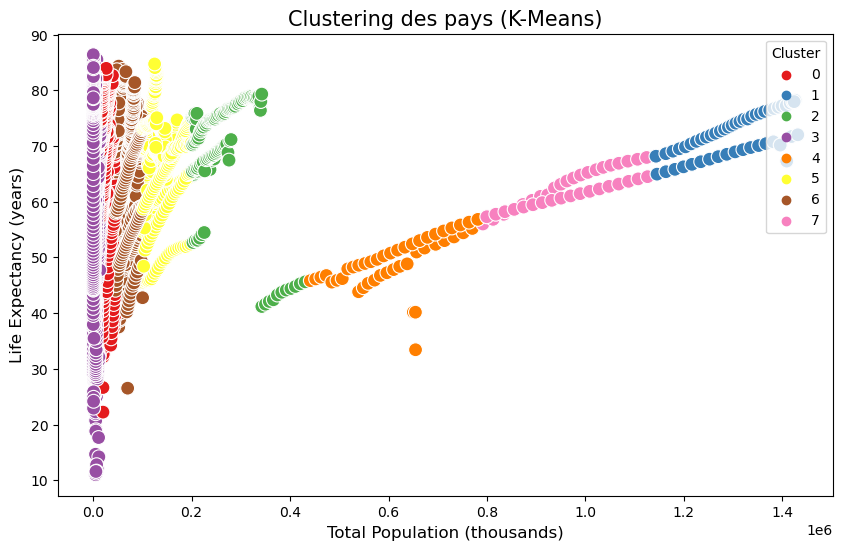

In [365]:
plt.figure(figsize=(10, 6))

# Utiliser les deux premières colonnes de caractéristiques pour la visualisation
sns.scatterplot(x=df_filtered['Total Population, as of 1 January (thousands)'], 
                y=df_filtered['Life Expectancy at Birth, both sexes (years)'], 
                hue=df_filtered['Cluster'], palette='Set1', s=100)

# Ajouter des titres et labels
plt.title('Clustering des pays (K-Means)', fontsize=15)
plt.xlabel('Total Population (thousands)', fontsize=12)
plt.ylabel('Life Expectancy (years)', fontsize=12)
plt.legend(title='Cluster', loc='upper right')

# Afficher la figure
plt.show()

In [253]:
pays_exemple = "France"
recommandations = recommander_pays(pays_exemple, df_filtered)
print(f"Pays similaires à '{pays_exemple}' : {recommandations}")

Pays similaires à 'France' : ['Ethiopia', 'Kenya', 'Madagascar', 'Malawi', 'Mozambique']


In [254]:
pays_exemple = "Canada"
recommandations = recommander_pays(pays_exemple, df_filtered)
print(f"Pays similaires à '{pays_exemple}' : {recommandations}")

Pays similaires à 'Canada' : ['Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Kenya']


In [255]:
pays_exemple = "Italy"
recommandations = recommander_pays(pays_exemple, df_filtered)
print(f"Pays similaires à '{pays_exemple}' : {recommandations}")

Pays similaires à 'Italy' : ['Ethiopia', 'Kenya', 'Uganda', 'United Republic of Tanzania', 'Democratic Republic of the Congo']


In [ ]:
# SVD

In [258]:
selected_columns = [
    'Country',
    'Year',
    'Total Population, as of 1 January (thousands)',
    'Population Growth Rate (percentage)',
    'Total Fertility Rate (live births per woman)',
    'Life Expectancy at Birth, both sexes (years)',
    'Infant Mortality Rate (infant deaths per 1,000 live births)',
    'Mean Age Childbearing (years)',
    'Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)',
    'Births by women aged 15 to 19 (thousands)',
    'Infant Deaths, under age 1 (thousands)',
    'Under-Five Deaths, under age 5 (thousands)'
]
df_filtered = df[selected_columns]

In [259]:
from sklearn.decomposition import TruncatedSVD
matrix = df_filtered.pivot_table(index='Country', columns='Year', values=df_filtered)

matrix = matrix.fillna(0)

svd = TruncatedSVD(n_components=2)
matrix_svd = svd.fit_transform(matrix)

matrix_approx = np.dot(matrix_svd, svd.components_)

In [297]:
def recommander_pays_svd(pays, top_n=5):
    if pays not in matrix.index:
        return f"Le pays '{pays}' n'existe pas dans les données."
    
    pays_idx = matrix.index.get_loc(pays)
    
    distances = np.linalg.norm(matrix_svd - matrix_svd[pays_idx, :], axis=1)
    
    similar_pays_idx = distances.argsort()[1:top_n+1]
    
    similar_pays = matrix.index[similar_pays_idx]
    similar_distances = distances[similar_pays_idx]
    return similar_pays,similar_distances

In [298]:
pays_exemple = "France"
recommandations_svd , distances_svd = recommander_pays_svd(pays_exemple)

Pays similaires à 'France':
United Kingdom: 24690.0872
Italy: 26862.4030
Thailand: 87202.3335
Ukraine: 90500.7735
Türkiye: 107369.8247


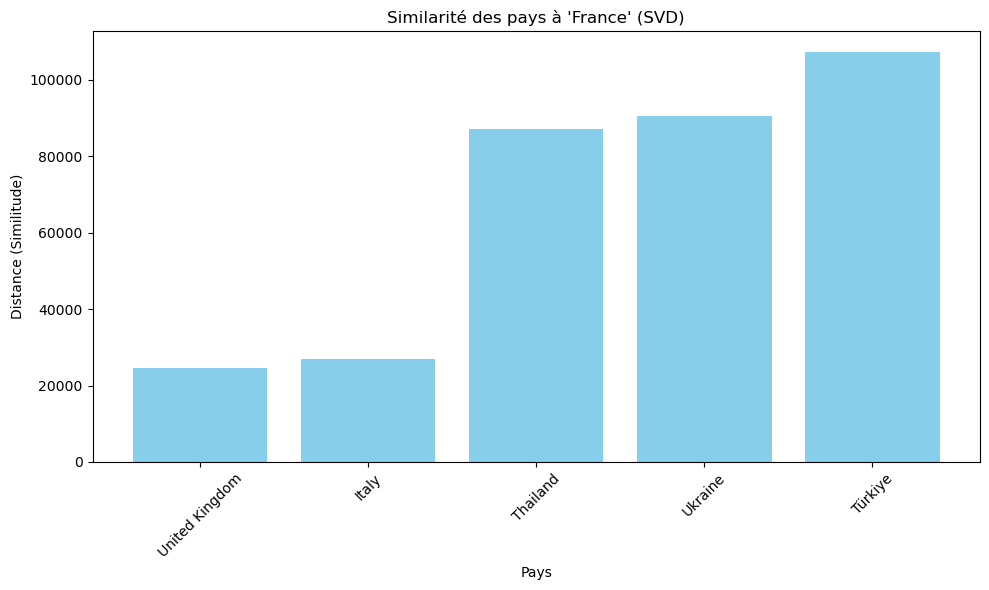

In [299]:
# Affichage des pays similaires et des distances
print(f"Pays similaires à '{pays_exemple}':")
for pays, distance in zip(recommandations_svd, distances_svd):
    print(f"{pays}: {distance:.4f}")

# Affichage sous forme de distribution (graphique)
plt.figure(figsize=(10, 6))
plt.bar(recommandations_svd, distances_svd, color='skyblue')
plt.xlabel('Pays')
plt.ylabel('Distance (Similitude)')
plt.title(f"Similarité des pays à '{pays_exemple}' (SVD)")
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

In [261]:
pays_exemple = "France"
recommandations_svd = recommander_pays_svd(pays_exemple)
print(f"Pays similaires à '{pays_exemple}':")
print(recommandations_svd)

Pays similaires à 'France':
Index(['United Kingdom', 'Italy', 'Thailand', 'Ukraine', 'Türkiye'], dtype='object', name='Country')


In [264]:
pays_exemple = "Canada"
recommandations_svd = recommander_pays_svd(pays_exemple)
print(f"Pays similaires à '{pays_exemple}':")
print(recommandations_svd)

Pays similaires à 'Canada':
Index(['Morocco', 'Algeria', 'Argentina', 'Peru', 'Colombia'], dtype='object', name='Country')


In [267]:
pays_exemple = "Morocco"
recommandations_svd = recommander_pays_svd(pays_exemple)
print(f"Pays similaires à '{pays_exemple}':")
print(recommandations_svd)

Pays similaires à 'Morocco':
Index(['Peru', 'Algeria', 'Uzbekistan', 'Sudan', 'Nepal'], dtype='object', name='Country')


In [ ]:
# Evaluation 

In [300]:
# from sklearn.metrics import mean_squared_error, precision_score, roc_auc_score
# import numpy as np

# # Fonction pour calculer RMSE
# def calculate_rmse(true_values, predicted_values):
#     return np.sqrt(mean_squared_error(true_values, predicted_values))

# # Fonction pour Precision@k
# def precision_at_k(predictions, actual, k=5):
#     top_k = predictions.argsort()[-k:][::-1]
#     return precision_score(actual[top_k], np.ones(k))

# # Fonction pour AUC
# def calculate_auc(predictions, actual):
#     return roc_auc_score(actual, predictions)

# # Évaluation du système KNN
# def evaluate_knn(pays_exemple, top_n=5):
#     true_values = matrix.loc[pays_exemple].values
#     _,indis = recommend_countries('Morocco')
#     predicted_values = matrix.iloc[indis].values.flatten()
    
#     print(len(predicted_values))
#     print(len(true_values))
    
#     # Calcul du RMSE
#     rmse = calculate_rmse(true_values, predicted_values)
    
#     # Calcul de Precision@k
#     precision = precision_at_k(predicted_values, true_values, k=top_n)
    
#     # Calcul de AUC
#     auc = calculate_auc(predicted_values, true_values)
    
#     return rmse, precision, auc

# # Exemple d'évaluation pour le KNN
# rmse_knn, precision_knn, auc_knn = evaluate_knn("France")
# print(f"KNN Evaluation (RMSE, Precision@k, AUC): {rmse_knn}, {precision_knn}, {auc_knn}")
